Using Pandas to analyse Covid 19 dataset 

    questions
1. Show the number of confirmed, deaths and recovered cases in each region
2. In which region was the maximum number of confirmed cases recorded
3. In which region was the minimum number of Deaths recorded
4. How many confirmed, death and recovered cases were recorded for Pakistan till April 29, 2020
5. Remove all the records where confirmed cases are less than 10

In [38]:
#importing pandas, seaborn and matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the covid 19 csv file
df=pd.read_csv('covid_19_data.csv')

In [3]:
#displaying the first 5 rows if the data
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [4]:
#displaying information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [37]:
#showing the number of missing values in the data according to columns
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

<Axes: >

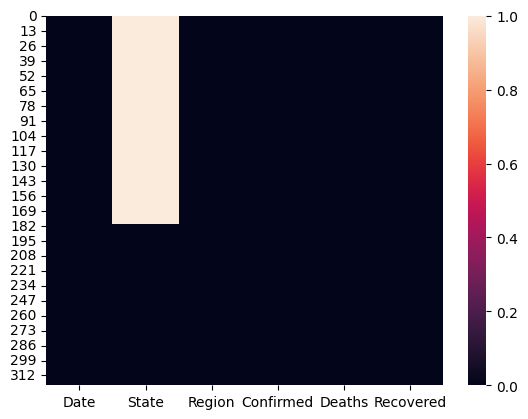

In [40]:
#showing all null values in the form of a heatmap
sns.heatmap(df.isnull())

Question 1

Show the number of confirmed,deaths and recovered cases in each region

In [41]:
#whenever you see each in a question, you are to use groupby function
#grouping the dataset by region and displaying only the columns confirmed, recovered and deaths
df_grouped=df.groupby('Region').sum()[['Confirmed','Recovered','Deaths']]
#checking to see if any region has more than one entry
df_grouped[df_grouped.value_counts("Region")>1]

,Confirmed,Recovered,Deaths
Region,,,


In [43]:
df_grouped

,Confirmed,Recovered,Deaths
Region,,,
Afghanistan,1939,252,60
Albania,766,455,30
Algeria,3848,1702,444
Andorra,743,423,42
Angola,27,7,2
...,...,...,...
West Bank and Gaza,344,71,2
Western Sahara,6,5,0
Yemen,6,1,0


Question 2

in which region was the maximum number of confirmed cases recorded

In [45]:
#sorting the dataset using the confirmed column in descending order and displaying the first 10 rows
max_confirmed=df_grouped.sort_values(by='Confirmed',ascending=False)[['Confirmed']].head(10)
max_confirmed

,Confirmed
Region,
US,1039909
Spain,236899
Italy,203591
France,166543
UK,166441
Germany,161539
Turkey,117589
Russia,99399
Iran,93657


In [46]:
max_confirmed_cases=max_confirmed.iloc[0]
print(f'The country with the most confirmed cases is {max_confirmed.index[0]} with {max_confirmed.loc[max_confirmed.index[0],"Confirmed"]} confirmed cases')

The country with the most confirmed cases is US with 1039909 confirmed cases


Question 3

In which region was the minimum number of deaths recorded

In [52]:
min_deaths=df_grouped.sort_values(by='Deaths',ascending=True)[['Deaths']].head(40)
min_deaths

,Deaths
Region,
Cambodia,0
Bhutan,0
Dominica,0
Central African Republic,0
Eritrea,0
Fiji,0
Holy See,0
Mozambique,0
Macau,0


Question 4

how many confirmed , deaths and recovered cases were recorded for Pakistan till April 29, 2020

In [59]:
info_pakistan=df[df.Region=='Pakistan']
info_pakistan

,Date,State,Region,Confirmed,Deaths,Recovered
124,4/29/2020,NaN,Pakistan,15525,343,3425


Question 5

Remove all the records where confirmed cases are less than 10

In [65]:
# displaying all records where confirmed cases are less than 10
df[df.Confirmed<10]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [66]:
# the code below deletes the records where confirmed cases are less than 10 but it does not delete the records permanently 
df[~(df.Confirmed)<10]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [70]:
#to delete the records permanently, you can use the code below of df=df[~(df.Confirmed)<10]
df.drop(df[df.Confirmed<10].index,inplace=True)

In [69]:
#now the number of rows has reduced from 321 to 304
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181
